In [28]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.pipeline import Pipeline

In [16]:
class GaussianFeatures(BaseEstimator, TransformerMixin):
  """Uniformly spaced Gaussian features for one-dimensional input"""
  def __init__(self, N, width_factor=2.0):
    self.N = N
    self.width_factor = width_factor
  @staticmethod
  def _gauss_basis(x,y,width,axis=None):
    arg = (x-y)/width
    return np.exp(-0.5*np.sum(arg**2,axis))
  def fit(self,X,y=None):
    # create N centers spread along the data range
    self.centers_ = np.linspace(X.min(),X.max(),self.N)
    self.width_ = self.width_factor*(self.centers_[1]-self.centers_[0])
    return self
  def transform(self,X):
    return self._gauss_basis(X[:,:,np.newaxis],self.centers_,self.width_,axis=1)



In [50]:
rng = np.random.RandomState(1)
x=10*rng.rand(50)
y=np.sin(x)+0.1*rng.randn(50)

gus = GaussianFeatures(60)
lr = LinearRegression()
# lr = Ridge(alpha=1)
model = Pipeline([('gus',gus),('lr',lr)])
model.fit(x[:,np.newaxis],y)
yfit0 = model.predict(x[:,np.newaxis])

gus = GaussianFeatures(60)
# lr = LinearRegression()
lr = Ridge(alpha=1.0)
model = Pipeline([('gus',gus),('lr',lr)])
model.fit(x[:,np.newaxis],y)
yfit1 = model.predict(x[:,np.newaxis])

gus = GaussianFeatures(60)
# lr = LinearRegression()
lr = Ridge(alpha=1.5)
model = Pipeline([('gus',gus),('lr',lr)])
model.fit(x[:,np.newaxis],y)
yfit2 = model.predict(x[:,np.newaxis])

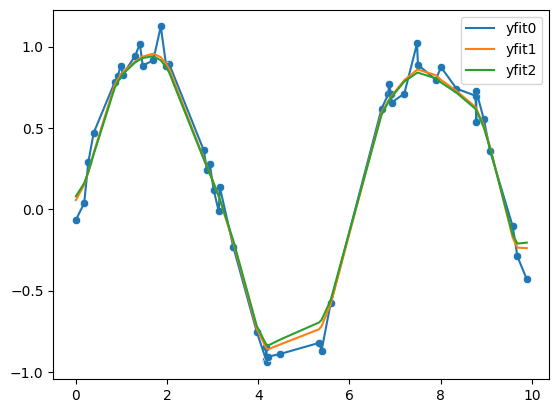

In [51]:
fig,axes=plt.subplots()
ax=axes
sns.scatterplot(x=x,y=y,ax=ax)
sns.lineplot(x=x,y=yfit0,ax=ax,label='yfit0')
sns.lineplot(x=x,y=yfit1,ax=ax,label='yfit1')
sns.lineplot(x=x,y=yfit2,ax=ax,label='yfit2')

plt.show()